In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
from google.colab import files
files.upload()

Saving heart.csv to heart.csv


{'heart.csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,

In [7]:
dataset = pd.read_csv('heart.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


rcParams['figure.figsize'] = 20,14
plt.matshow(dataset.corr())
plt.xticks(np.arange(dataset.shape[1]),dataset.columns)
plt.yticks(np.arange(dataset.shape[1]),dataset.columns)
plt.colorbar()

In [32]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29795b0160>,
      dtype=object)

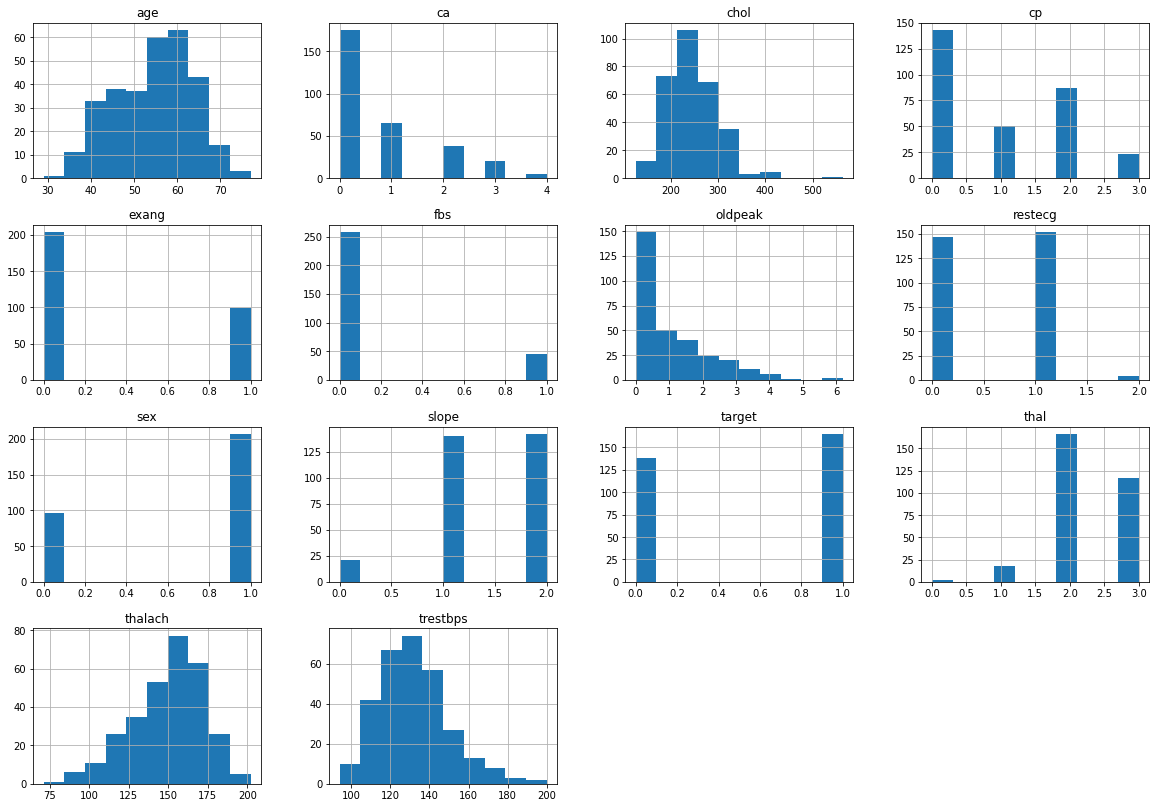

In [16]:
dataset.hist()

Text(0.5, 1.0, 'Count of each Target Class')

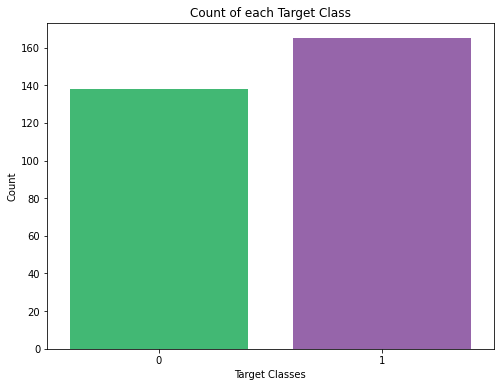

In [31]:
import seaborn as sns
plt.figure(figsize = (8,6))
flatui = ["#2ecc71","#9b59b6"]
sns.countplot(dataset['target'],palette =sns.color_palette(flatui))
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [33]:
dataset = pd.get_dummies(dataset , columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [35]:
standardScaler = StandardScaler()
dataset[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = standardScaler.fit_transform(dataset[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [0]:
y= dataset['target']
X = dataset.drop(['target'] , axis =1 )
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state = 1)

#K Neighbors Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier
ans = []
for i in range(1,21):
  knn_clf = KNeighborsClassifier(n_neighbors = i)
  knn_clf.fit(X_train , y_train)
  score = knn_clf.score(X_test,y_test)
  ans.append(score)
print(ans)
print(np.argmax(ans)+1)


[0.6885245901639344, 0.7377049180327869, 0.8032786885245902, 0.7868852459016393, 0.7704918032786885, 0.7704918032786885, 0.7704918032786885, 0.7704918032786885, 0.8032786885245902, 0.7704918032786885, 0.7540983606557377, 0.7704918032786885, 0.7868852459016393, 0.7704918032786885, 0.8032786885245902, 0.8032786885245902, 0.819672131147541, 0.819672131147541, 0.819672131147541, 0.8032786885245902]
17


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

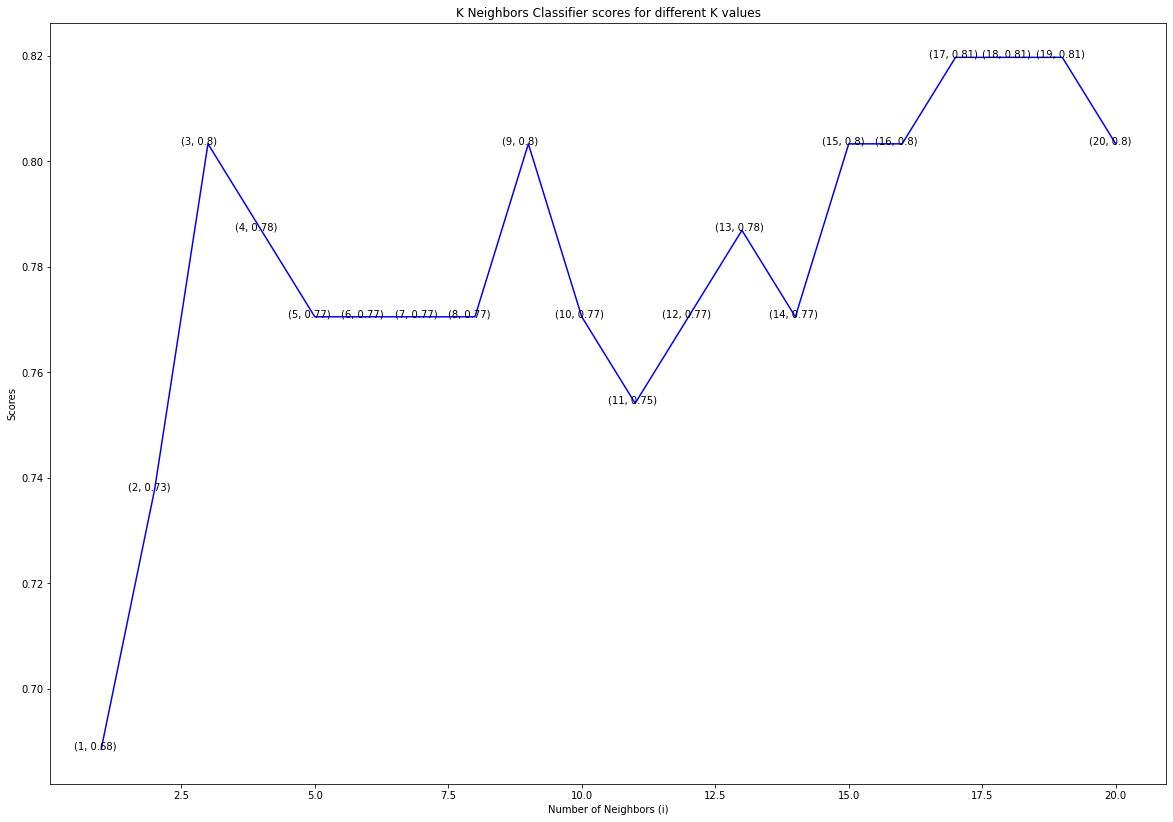

In [55]:
plt.plot([k for k in range(1,21)], ans , color = 'blue')
for i in range(1,21):
  plt.text(i-0.5, ans[i-1], (i,float( str(ans[i-1])[:4])))
plt.xlabel('Number of Neighbors (i)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

#Support Vector Classifier

In [0]:
from sklearn.svm import SVC
ans = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels :
  svc_clf = SVC(kernel = k)
  svc_clf.fit(X_train, y_train)
  ans.append(svc_clf.score(X_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

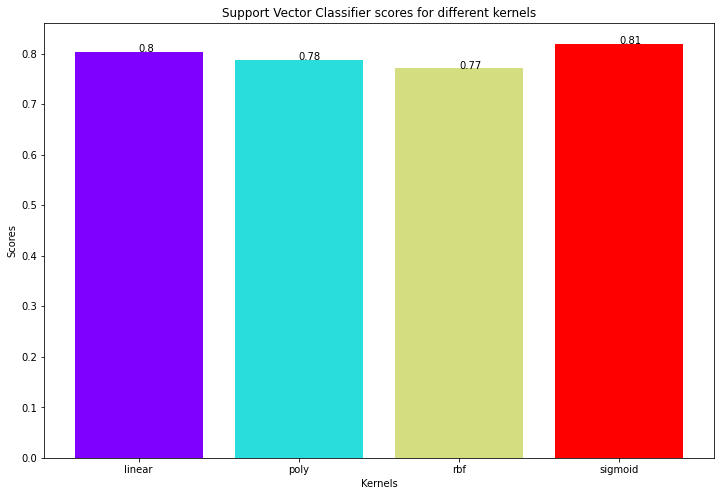

In [65]:
colors = rainbow(np.linspace(0,1,len(kernels)))
plt.figure(figsize = (12,8))
plt.bar(kernels, ans, color = colors)
for i in range(len(kernels)):
    plt.text(i, ans[i],float(str(ans[i])[:4]))
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

#Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
ans = []
for i in range(1 ,len(X.columns)+1):
  dt_clf = DecisionTreeClassifier(max_features = i , random_state = 0)
  dt_clf.fit(X_train, y_train)
  ans.append(dt_clf.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

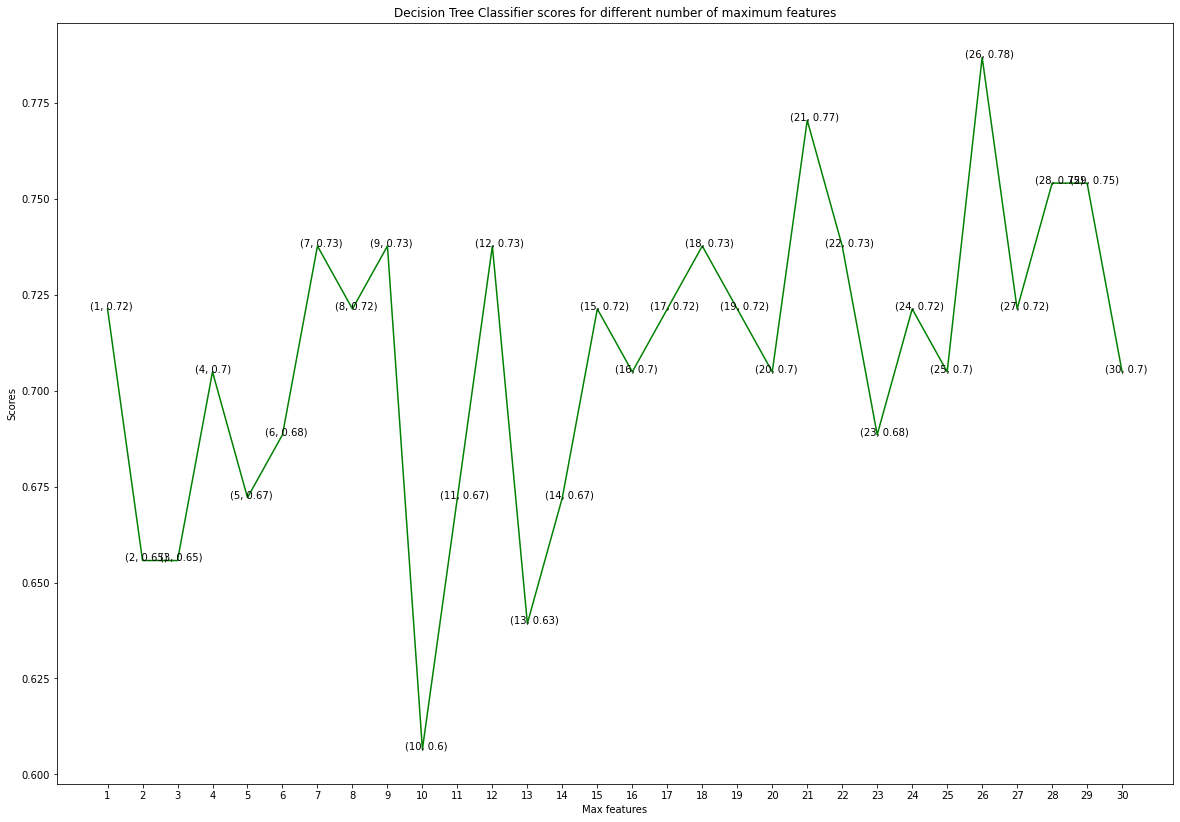

In [75]:
plt.plot([i for i in range(1, len(X.columns) + 1)], ans, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i-0.5, ans[i-1],(i,float( str(ans[i-1])[:4])))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

#Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
ans = []
estimators = [10, 100, 200, 500, 1000]
for est in estimators:
  rf_clf = RandomForestClassifier(n_estimators = est ,random_state =0)
  rf_clf.fit(X_train, y_train)
  ans.append(rf_clf.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

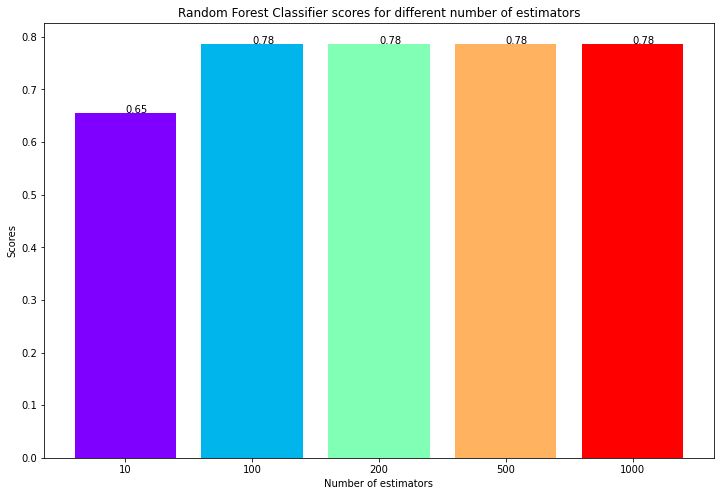

In [80]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.figure(figsize = (12,8))
plt.bar([i for i in range(len(estimators))], ans, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, ans[i], float(str(ans[i])[:4]))
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

# From above Visualization we can infer that score is high for :

knn_clf at n_neighbors = **16,17,18**

svc_clf at kernal = **'sigmoid'**

dt_clf at max_features = **26**

rf_clf at n_estimators = **100,200,500,1000**






In [86]:
import joblib

knn_clf = KNeighborsClassifier(n_neighbors = 16)
knn_clf.fit(X_train , y_train)
joblib.dump(knn_clf, 'KNN.pkl')

svc_clf = SVC(kernel = 'sigmoid')
svc_clf.fit(X_train, y_train)
joblib.dump(knn_clf, 'SVC.pkl')

dt_clf = DecisionTreeClassifier(max_features = 26 , random_state = 0)
dt_clf.fit(X_train, y_train)
joblib.dump(dt_clf, 'DT.pkl')

rf_clf = RandomForestClassifier(n_estimators = 100 ,random_state =0)
rf_clf.fit(X_train, y_train)
joblib.dump(rf_clf, 'RF.pkl')

['RF.pkl']